In [1]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


In [2]:
tDir = '../targetDir'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='r00000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'r00000' Good!


In [5]:
tParams = tInfo.getImageParams()
#gm.pprint( tParams )

In [6]:
newRunScoreArg = gm.inArgClass()
newRunScoreArg.setArg( 'rInfo', rInfo )
newRunScoreArg.setArg( 'scoreParams', tParams )
newRunScoreArg.setArg( 'printAll', True )
newRunScoreArg.setArg( 'newScore', True )
newRunScoreArg.setArg( 'newImage', True )
newRunScoreArg.setArg( 'overWrite', True )

simr.simr_run( rInfo = rInfo, arg = newRunScoreArg )
rInfo.printScores(allScores=True)

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7fdf386a91c0>
IC: image_creator_run
IC: rInfo.status:  True
IC: given parameters: 2
IC:  zoo_0
IC: Creating image:
	 - runId: r00000
	 - score: zoo_0
IC: Image 'zoo_0' already made for r00000
	 - Creating image from points
	 - Saving model image at: /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/model_images/zoo_0_model.png
	 - Saving unperturbed at: /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/misc_images/zoo_0_init.png
IC:  zoo_2  1 /    2
IC: Creating image:
	 - runId: r00000
	 - score: zoo_2
IC: Image 'zoo_2' already made for r00000
	 - Creating image from points
	 - Saving model image at: /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/model_images/zoo_2_model.png
	 - Saving unperturbed at: /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/misc_images/zo

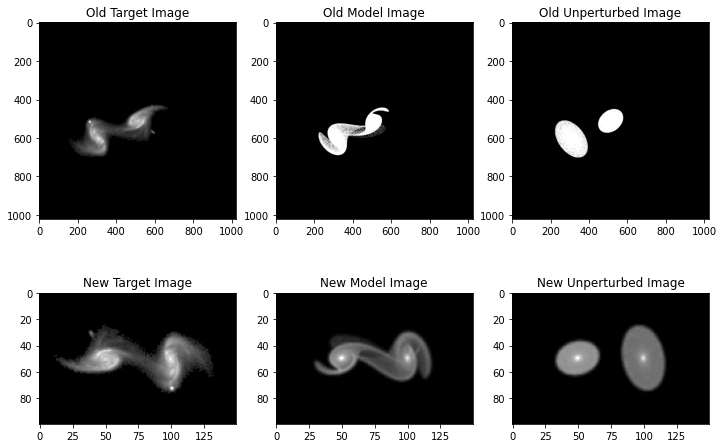

In [10]:
# View new model image next to target image

fig, ax = plt.subplots(2,3,figsize=(12,8))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( tInfo.getTargetImage( 'zoo_0'), cmap='gray' )

ax[0,1].set_title("Old Model Image")
ax[0,1].imshow( rInfo.getModelImage( 'zoo_0' ), cmap='gray' )

ax[0,2].set_title("Old Unperturbed Image")
ax[0,2].imshow( rInfo.getModelImage( 'zoo_0', initImg=True ), cmap='gray' )

ax[1,0].set_title("New Target Image")
ax[1,0].imshow( tInfo.getTargetImage( 'zoo_2'), cmap='gray' )

ax[1,1].set_title("New Model Image")
ax[1,1].imshow( rInfo.getModelImage( 'zoo_2' ), cmap='gray' )

ax[1,2].set_title("New Unperturbed Image")
ax[1,2].imshow( rInfo.getModelImage( 'zoo_2', initImg=True ), cmap='gray' )